<a href="https://colab.research.google.com/github/Russy-Veemon/Page-View-Time-Series-Visualizer/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.**

In [20]:
#When creating a data frame and making setting a certain column as the index, like date in this example, be sure to add parse_dates, 
# index to be able to get the plot to show the dates as a value when the index is called as the x or y axis
#  , parse_dates=['date'], index_col='date')
forum = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
# forum.set_index('date', inplace=True)
print(forum)

             value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-02  220144
2019-12-03  158549

[1304 rows x 1 columns]


**Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.**

In [18]:
#filtering out the bottom 2.5% of data
filtered_forum = forum[forum['value'] >= forum['value'].quantile(0.025)]
#filtering out the top 2.5% of data
filtered_forum = forum[forum['value'] <= forum['value'].quantile(0.975)]
print(filtered_forum)

             value
date              
2016-05-09    1201
2016-05-10    2329
2016-05-11    1716
2016-05-12   10539
2016-05-13    6933
...            ...
2019-11-24  138875
2019-11-29  171584
2019-11-30  141161
2019-12-01  142918
2019-12-03  158549

[1271 rows x 1 columns]


**Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.**

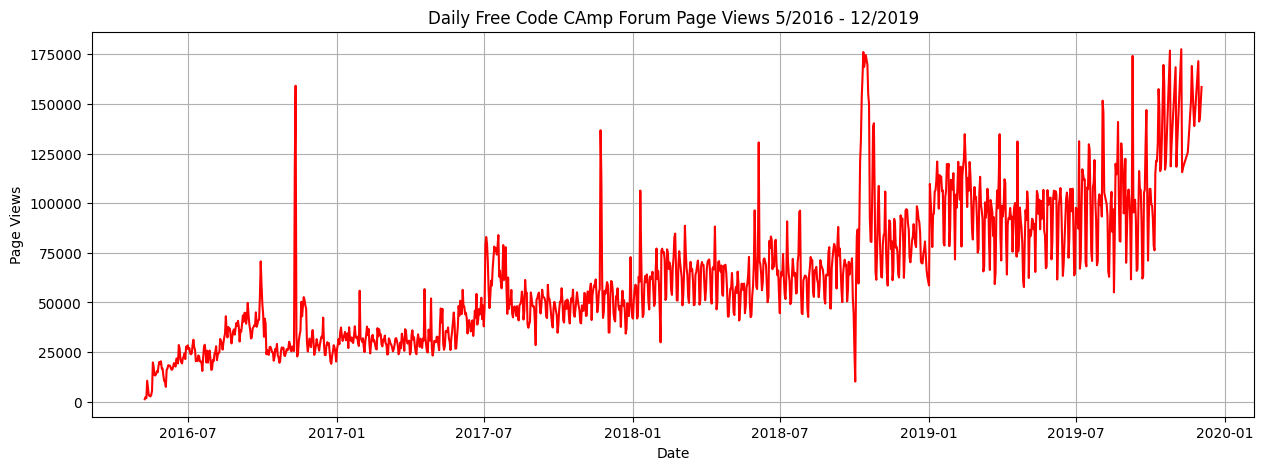

In [19]:
#create a line chart using matplotlib
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(filtered_forum.index, filtered_forum['value'], color='red')

#customize the plot
ax.set_title('Daily Free Code CAmp Forum Page Views 5/2016 - 12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.grid(True)

#call the plot
plt.show()


**Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.**

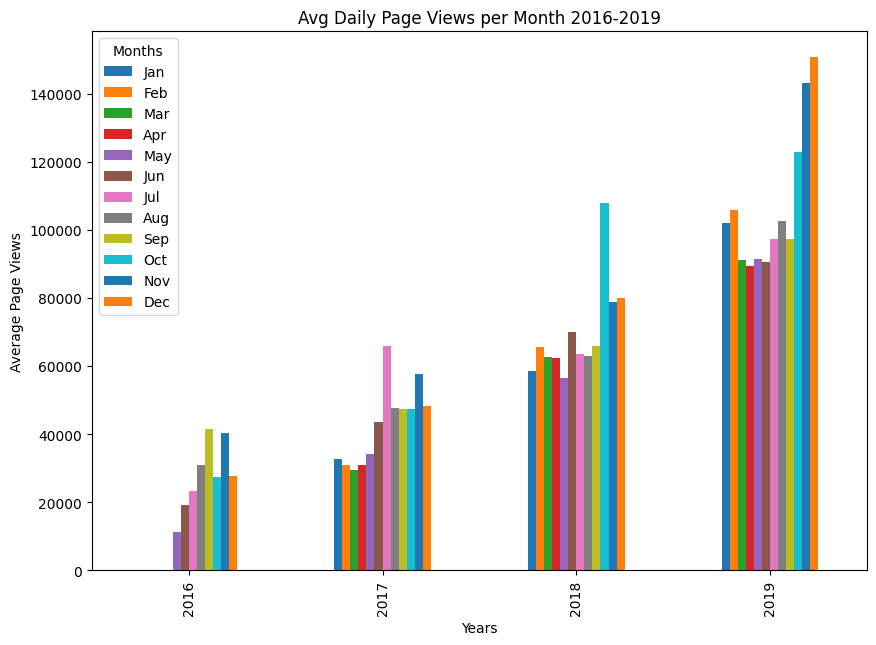

In [30]:
#group the data by year and month, and calculate avg pg views
forum_bar = filtered_forum.groupby([filtered_forum.index.year, filtered_forum.index.month]).mean()
#switch the data frame into a wide format so that each month is separated with its own values
forum_bar = forum_bar.unstack()
# print(forum_bar)

#create a bar chart with matplotlib
fig, ax = plt.subplots(figsize=(10, 7))
forum_bar.plot(kind='bar', ax=ax)

# customize the plot
ax.set_title('Avg Daily Page Views per Month 2016-2019')
ax.set_xlabel('Years')
ax.set_ylabel('Average Page Views')
ax.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#call the plot
plt.show()


**Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.**

In [ ]:
# Create catplot with value counts of each categorical feature for the different cardio values
g = sns.catplot(x='variable', col='cardio', hue='value', data=me_long, kind='count')

# Set axis labels and title
g.set_axis_labels('variables', 'variables')
g.fig.suptitle('Values for Different Cardio Values')

# Show the plot
plt.show()